<a href="https://colab.research.google.com/github/jon-chun/sentiment_cruxes/blob/main/sa_gutenberg_class_Nov1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jon Chun
24 Oct 2021

# **Setup and Configuration**

In [1]:
!pip install texthero

     |████████████████████████████████| 1.5 MB 6.1 MB/s 
     |████████████████████████████████| 235 kB 60.6 MB/s 
     |████████████████████████████████| 749 kB 49.7 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import string
import re

In [4]:
from google.colab import files

In [5]:
%matplotlib inline

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

# **Get the Novel Text**

## **OPTION (a): Connect and Read from gDrive** *italicized text*

(Upload novel textfile to Google Drive under root folder **./MyDrive** first)

In [7]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
# drive.mount("/gdrive", force_remount=True)

In [8]:
!ls

MyDrive  Othercomputers


In [9]:
%cd ./MyDrive/

/gdrive/MyDrive


In [10]:
!ls

 05133.pdf
 05-ls.pdf
 1204.4809.pdf
 1802.01405v1.pdf
 1805.00705v2.pdf
 1907.06902.pdf
 1-s2.0-S0957417420310162-main.pdf
'1-s2 (1).0-S0957417420310162-main.pdf'
 2001.08210.pdf
 2002.09419.gdoc
 2002.09419.pdf
 20190113124834720.pdf
 2019_10_18_machinelearning_working_group.ppt
'2019 Apr Tech Notes.gdoc'
'2019 Feb Tech Notes.gdoc'
'2019 Jan Tech Notes.gdoc'
'2019 June Tech Notes.gdoc'
'2019 Mar Tech Notes.gdoc'
'2019 May Tech Notes.gdoc'
'2019 Spring Programming Humanity.gdoc'
 202006_nlg_theater.gdoc
 2102.07350v1.pdf
 3sentiments_5woolf_palefire_20191031.ipynb
 505242966.pdf
'ADHO 2019 Proposal.gdoc'
'ai4hum_lab_20191022_Discovering and Visualizing Topics in Texts with LDA_20191019_master.ipynb'
 ai4hum_lab_20191022_sentiment_lda_gutenberg_master.ipynb
 ai4hum_lab_20191022_topic-modeling-with-colab-gensim-mallet.ipynb
 ai4hum_lab_20191028_lda_topic_modeling_palefire.ipynb
'AI and the Liberal Arts: Computational Humanities_20190529.gdoc'
'AI and the Liberal Arts: Computational Huma

In [12]:
# %cd ./research/2021/sa_book_code/books_sa/jkrowling_1sorcerersstone/

/gdrive/MyDrive/research/2021/sa_book_code/books_sa/jkrowling_1sorcerersstone


In [13]:
!ls *.txt

cruxes_context.txt			     hpotter1_sorcerersstone.txt
hpotter1_sorcerers_stone_handclean_utf8.txt  jkrowling_1sorcerersstone.txt


In [14]:
novel_ls = []
novel_parags_ls = []

novel_filename = 'jkrowling_1sorcerersstone.txt'

In [7]:
#@title Enter the Novel_Title in the form [Title] by [Author]


Novel_Title = "Harry Potter and the Socerer's Stone by J.K. Rowling" #@param {type:"string"}

In [ ]:
# Read novel into list of Sentences/lines

with open(novel_filename, 'r') as fp:
  novel_ls = fp.readlines()

print(f'Line Count: {len(novel_ls)}')

Line Count: 6135


In [ ]:
# Read novel into list of Paragraphs

delimiter = "\n"

with open(novel_filename, "r") as fp:
  all_content = fp.read() #reading all the content in one step
  #using the string methods we split it
  novel_parags_ls = all_content.split(delimiter)
  novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]

print(f'Paragraph Count: {len(novel_parags_ls)}')

Paragraph Count: 3068


In [ ]:
novel_parags_ls[:10]

['CHAPTER 1',
 'THE BOY WHO LIVED',
 "Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.",
 'Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 "The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's

In [ ]:
novel_ls[4]

"Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. \n"

In [ ]:
!pip install contractions

     |████████████████████████████████| 321 kB 8.5 MB/s 
     |████████████████████████████████| 284 kB 49.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=24c7db06253e688a658a1538ae55d8e2d264ba7f551dec15a20fac4e34ccc19f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
import contractions
contractions.fix("you're happy now")

'you are happy now'

In [ ]:
# novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_ls]
novel_clean_ls = [contractions.fix(x) for x in novel_ls]
novel_clean_ls = [re.sub(r'[\n]+', ' ', x).strip() for x in novel_clean_ls]
novel_clean_ls = [x.strip() for x in novel_clean_ls if len(x.strip()) > 1]
# novel_clean_ls = [re.sub(r"^[\"\']", "", x) for x in novel_clean_ls]  # re.sub("[\"\']", "", s)
# novel_clean_ls = [re.sub(r"[\"\']$", "", x) for x in novel_clean_ls]
novel_clean_ls = [x.encode('ascii',errors='ignore').decode() for x in novel_clean_ls]
# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

[f'[{x}]' for x in novel_clean_ls]

['[CHAPTER 1]',
 '[THE BOY WHO LIVED]',
 '[Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you would expect to be involved in anything strange or mysterious, because they just did not hold with such nonsense.]',
 '[Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.]',
 "[The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They did not think they could bear it if anyone found out about the Potters. Mrs. Potter was

In [ ]:
novel_clean_str = '\n'.join(novel_clean_ls)
print(novel_clean_str[:5000])

CHAPTER 1
THE BOY WHO LIVED
Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you would expect to be involved in anything strange or mysterious, because they just did not hold with such nonsense.
Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.
The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They did not think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but

In [ ]:
# novel_clean_ls[1] = "THE SILVER SPOON I was born twice: first, as a baby girl, on a remarkably smogless Detroit day in January of 1960; and then again, as a teenage boy, in an emergency room near Petoskey, Michigan, in August of 1974. Specialized readers may have come across me in Dr. Peter Luce’s study, “Gender Identity in 5-Alpha-Reductase Pseudohermaphrodites,” published in theJournal of Pediatric Endocrinology in 1975. Or maybe you’ve seen my photograph in chapter sixteen of the now sadly outdatedGenetics and Heredity."

In [ ]:
# novel_clean_ls.pop(0)

'ALSO BY JEFFREY EUGENIDES The Virgin SuicidesMIDDLESEXFarrar, Straus and Giroux 19 Union Square West, New York 10003  Copyright  2002 by Jeffrey Eugenides All rights reserved Published simultaneously in Canada by Alfred A. Knopf Canada, a division of Random House of Canada Limited, Toronto First edition, 2002  Portions of this novel appeared, in different form, inThe New Yorker andGranta .'

In [ ]:
novel_clean_ls[:10]

['CHAPTER 1',
 'THE BOY WHO LIVED',
 'Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you would expect to be involved in anything strange or mysterious, because they just did not hold with such nonsense.',
 'Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.',
 "The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They did not think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dur

In [ ]:
novel_clean_ls[-10:]

['"Very," said Harry. "Thanks for the fudge and the sweater, Mrs. Weasley."',
 '"Oh, it was nothing, dear."',
 '"Ready, are you?"',
 'It was Uncle Vernon, still purple-faced, still mustached, still looking furious at the nerve of Harry, carrying an owl in a cage in a station full of ordinary people. Behind him stood Aunt Petunia and Dudley, looking terrified at the very sight of Harry.',
 '"You must be Harry\'s family!" said Mrs. Weasley.',
 '"In a manner of speaking," said Uncle Vernon. "Hurry up, boy, we have not got all day." He walked away.',
 'Harry hung back for a last word with Ron and Hermione.',
 '"See you over the summer, then."',
 '"Hope you have -- er -- a good holiday," said Hermione, looking uncertainly after Uncle Vernon, shocked that anyone could be so unpleasant.',
 '"Oh, I will," said Harry, and they were surprised at the grin that was spreading over his face. "They do not know we are not allowed to use magic at home. I am going to have a lot of fun with Dudley this s

In [ ]:
# novel_clean_str = '\n'.join(novel_clean_ls)

# novel_bin = novel_clean_str.encode('ascii',errors='ignore')
# novel_clean_str = novel_bin.decode()

# print(novel_clean_str[:5000])

## OPTION (b): **Scrape Project Gutenberg**

**Goto *https://gutenberg.net.au* and find the *.HTML (not *.TXT) version of your novel**

In [7]:
from bs4 import BeautifulSoup

import requests

In [8]:
#@title Enter the URL of your novel at ***gutenberg.net.au***
#@markdown Paste the URL to the ***HTML version*** (not plain text).

Novel_Title = "'Wuthering Heights by Emily Bronte"  #@param {type: "string"}

Gutenberg_URL = 'https://www.gutenberg.org/cache/epub/768/pg768-images.html'  #@param {type: "string"}


In [9]:
# Get raw HTML of novel from Gutenberg.net.au

response=requests.get(Gutenberg_URL)  # TODO: Pass the URL to the .get() method of the requests object
html = response.text

In [10]:
# View raw HTML that we need to clean up

# TODO: What is the difference between these two outputs?

# Option A: 
html

# Option B:
# print(html)

'<!DOCTYPE html>\r\n<html lang="en">\r\n<head>\r\n<meta charset="utf-8">\r\n<meta name="generator" content="HTML Tidy for HTML5 for Linux version 5.6.0">\r\n<title>The Project Gutenberg eBook of Wuthering Heights, by Emily Brontë</title>\r\n\r\n<style>/**/\r\nbody {\r\n    margin-left: 20%;\r\n    margin-right: 20%;\r\n    text-align: justify\r\n    }\r\nh1, h2, h3, h4, h5 {\r\n    text-align: center;\r\n    font-style: normal;\r\n    font-weight: normal;\r\n    line-height: 1.5;\r\n    margin-top: 0.5em;\r\n    margin-bottom: 0.5em\r\n    }\r\nh1 {\r\n    font-size: 300%;\r\n    margin-top: 0.6em;\r\n    margin-bottom: 0.6em;\r\n    letter-spacing: 0.12em;\r\n    word-spacing: 0.2em;\r\n    text-indent: 0\r\n    }\r\nh2 {\r\n    font-size: 150%;\r\n    margin-top: 2em;\r\n    margin-bottom: 1em\r\n    }\r\nh3 {\r\n    font-size: 150%;\r\n    margin-top: 2em\r\n    }\r\nh4 {\r\n    font-size: 120%\r\n    }\r\nh5 {\r\n    font-size: 110%\r\n    }\r\nhr {\r\n    width: 80%;\r\n    margin

# **Trim Novel Text**

## **Using Beautiful Soup**

In [11]:
#Create a BeautifulSoup object from the HTML

soup = BeautifulSoup(html, "html.parser")


paragraph=soup.find_all("p")  # TODO: get all the <P>Paragraphs</P> 
                                #       see bs4 API ref: https://beautiful-soup-4.readthedocs.io/en/latest/#kinds-of-objects
parag_ls = []
for para in paragraph:
    parag_ls.append(para.text)

print(f'There were {len(parag_ls)} Paragraphs:\n') # TODO how do you get the number of paragraphs in the list parag_ls?

print(f"First 3 Paragraphs: ==============================    \n")
print(f"    {list(print(x) for x in parag_ls[:3])}\n")  # TODO: Give index to retrieve the first 3 paragraphs

print(f"Last 3 Paragraphs: ============================== \n")
print(f"    {list(print(x) for x in parag_ls[-3:])}\n")  # TODO: Give index to retrieve the last 3 paragraphs


There were 1930 Paragraphs:

First 3 Paragraphs: ==============================    

1801—I have just returned from a visit to my landlord—the solitary neighbour that I shall be troubled with. This is certainly a beautiful country! In all England, I do not believe that I could have fixed on a situation so completely removed from the stir of society. A perfect misanthropist’s Heaven—and Mr. Heathcliff and I are such a suitable pair to divide the desolation between us. A capital fellow! He little imagined how my heart warmed towards him when I beheld his black eyes withdraw so suspiciously under their brows, as I rode up, and when his fingers sheltered themselves, with a jealous resolution, still further in his waistcoat, as I announced my name.
“Mr. Heathcliff?” I said.
A nod was the answer.
    [None, None, None]

Last 3 Paragraphs: ============================== 

My walk home was lengthened by a diversion in the direction of the kirk. When beneath its walls, I perceived decay had mad

## **Using Python [string].partition() or RegEx**

In [12]:
# Concatenate all paragraphs into a single novel string

# For every paragraph, replace all hardcoded \r\n with a single space
parag_flat_ls = [re.sub(r'\r\n', ' ', aparag) for aparag in parag_ls]

# Concatenate all paragraphs into a single string, separated by \n
novel_str = '\n'.join(parag_flat_ls)

print('\nSTART OF NOVEL: -----')
print(novel_str[:1000] + '\n')

print('\nEND OF NOVEL: -----\n')
print(novel_str[-1000:])


START OF NOVEL: -----
1801—I have just returned from a visit to my landlord—the solitary neighbour that I shall be troubled with. This is certainly a beautiful country! In all England, I do not believe that I could have fixed on a situation so completely removed from the stir of society. A perfect misanthropist’s Heaven—and Mr. Heathcliff and I are such a suitable pair to divide the desolation between us. A capital fellow! He little imagined how my heart warmed towards him when I beheld his black eyes withdraw so suspiciously under their brows, as I rode up, and when his fingers sheltered themselves, with a jealous resolution, still further in his waistcoat, as I announced my name.
“Mr. Heathcliff?” I said.
A nod was the answer.
“Mr. Lockwood, your new tenant, sir. I do myself the honour of calling as soon as possible after my arrival, to express the hope that I have not inconvenienced you by my perseverance in soliciting the occupation of Thrushcross Grange: I heard yesterday you had

**Enter the First and Last several words to use as RegEx for trimming header/footers**

In [13]:
#@title Enter the first sentence in the body of your novel
sentence_first_str = '1801\u2014I have just returned from a visit to my landlord'  #@param {type: "string"}

#@title Enter the last sentence in the body of your novel
sentence_last_str = 'imagine unquiet slumbers for the sleepers in that quiet earth.'  #@param {type: "string"}


In [14]:
# Strip off the header
novel_clean = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
' '.join(novel_clean.partition(sentence_last_str)[:2])[-500:]

'n storms.\nI sought, and soon discovered, the three headstones on the slope next the moor: the middle one grey, and half buried in the heath; Edgar Linton’s only harmonized by the turf and moss creeping up its foot; Heathcliff’s still bare.\nI lingered round them, under that benign sky: watched the moths fluttering among the heath and harebells, listened to the soft wind breathing through the grass, and wondered how any one could ever  imagine unquiet slumbers for the sleepers in that quiet earth.'

In [15]:
# Strip off the header
novel_clean_str = ' '.join(novel_str.partition(sentence_first_str)[1:])

# Strip off the footer
novel_clean_str = ' '.join(novel_clean_str.partition(sentence_last_str)[:2])

# Verify

print('\nSTART OF CLEAN NOVEL: -----')
print(novel_clean_str[:1000] + '\n')

print('\nEND OF CLEAN NOVEL: -----\n')
print(novel_clean_str[-1000:])


START OF CLEAN NOVEL: -----
1801—I have just returned from a visit to my landlord —the solitary neighbour that I shall be troubled with. This is certainly a beautiful country! In all England, I do not believe that I could have fixed on a situation so completely removed from the stir of society. A perfect misanthropist’s Heaven—and Mr. Heathcliff and I are such a suitable pair to divide the desolation between us. A capital fellow! He little imagined how my heart warmed towards him when I beheld his black eyes withdraw so suspiciously under their brows, as I rode up, and when his fingers sheltered themselves, with a jealous resolution, still further in his waistcoat, as I announced my name.
“Mr. Heathcliff?” I said.
A nod was the answer.
“Mr. Lockwood, your new tenant, sir. I do myself the honour of calling as soon as possible after my arrival, to express the hope that I have not inconvenienced you by my perseverance in soliciting the occupation of Thrushcross Grange: I heard yesterday 

# **Split Novel into Sentences**

* https://github.com/zaemyung/sentsplit (CRF: mincut)

* https://github.com/adobe/NLP-Cube and Rank ~15 https://aclanthology.org/K18-2017.pdf

In [16]:
# Read novel into list of Paragraphs

delimiter = "\n"

novel_parags_ls = novel_clean_str.split(delimiter)
novel_parags_ls = [x.strip() for x in novel_parags_ls if len(x.strip()) > 2]
novel_parags_ls = [' '.join(x.split()) for x in novel_parags_ls]

print(f'Paragraph Count: {len(novel_parags_ls)}')

Paragraph Count: 1930


In [17]:
novel_parags_ls[:15]

['1801—I have just returned from a visit to my landlord —the solitary neighbour that I shall be troubled with. This is certainly a beautiful country! In all England, I do not believe that I could have fixed on a situation so completely removed from the stir of society. A perfect misanthropist’s Heaven—and Mr. Heathcliff and I are such a suitable pair to divide the desolation between us. A capital fellow! He little imagined how my heart warmed towards him when I beheld his black eyes withdraw so suspiciously under their brows, as I rode up, and when his fingers sheltered themselves, with a jealous resolution, still further in his waistcoat, as I announced my name.',
 '“Mr. Heathcliff?” I said.',
 'A nod was the answer.',
 '“Mr. Lockwood, your new tenant, sir. I do myself the honour of calling as soon as possible after my arrival, to express the hope that I have not inconvenienced you by my perseverance in soliciting the occupation of Thrushcross Grange: I heard yesterday you had had som

In [18]:
for i,aline in enumerate(novel_parags_ls):
  if (len(aline.strip()) < 5):
    print(f'Line #{i}: {aline}')

In [19]:
novel_clean_str = '\n'.join(novel_parags_ls)
novel_clean_str[:2000]

'1801—I have just returned from a visit to my landlord —the solitary neighbour that I shall be troubled with. This is certainly a beautiful country! In all England, I do not believe that I could have fixed on a situation so completely removed from the stir of society. A perfect misanthropist’s Heaven—and Mr. Heathcliff and I are such a suitable pair to divide the desolation between us. A capital fellow! He little imagined how my heart warmed towards him when I beheld his black eyes withdraw so suspiciously under their brows, as I rode up, and when his fingers sheltered themselves, with a jealous resolution, still further in his waistcoat, as I announced my name.\n“Mr. Heathcliff?” I said.\nA nod was the answer.\n“Mr. Lockwood, your new tenant, sir. I do myself the honour of calling as soon as possible after my arrival, to express the hope that I have not inconvenienced you by my perseverance in soliciting the occupation of Thrushcross Grange: I heard yesterday you had had some thoughts

In [20]:
import nltk

nltk.download('punkt')

from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
novel_sents_ls = sent_tokenize(novel_clean_str)

sent_ct = len(novel_sents_ls)
sent_show = 10

print('\nFirst Sentences: -----\n')
# for i, asent in enumerate(novel_sents_ls[:sent_show]):
for i, asent in enumerate(novel_sents_ls[:sent_show]):
  print(f'Sentences #{i}: {asent}')


print('\nLast Sentences: -----\n')
for i, asent in enumerate(novel_sents_ls[-sent_show:]):
  print(f'Sentences #{sent_ct - (sent_show - i)}: {asent}')


print(f'\n\nThere are {sent_ct} Sentences in the novel')


First Sentences: -----

Sentences #0: 1801—I have just returned from a visit to my landlord —the solitary neighbour that I shall be troubled with.
Sentences #1: This is certainly a beautiful country!
Sentences #2: In all England, I do not believe that I could have fixed on a situation so completely removed from the stir of society.
Sentences #3: A perfect misanthropist’s Heaven—and Mr. Heathcliff and I are such a suitable pair to divide the desolation between us.
Sentences #4: A capital fellow!
Sentences #5: He little imagined how my heart warmed towards him when I beheld his black eyes withdraw so suspiciously under their brows, as I rode up, and when his fingers sheltered themselves, with a jealous resolution, still further in his waistcoat, as I announced my name.
Sentences #6: “Mr.
Sentences #7: Heathcliff?” I said.
Sentences #8: A nod was the answer.
Sentences #9: “Mr.

Last Sentences: -----

Sentences #5205: “Yes,” answered Mrs. Dean, “as soon as they are married, and that will 

In [22]:
# View the Sentences that have no letters in them

[x.strip() for x in novel_sents_ls if not re.search('[a-zA-Z]', x)]

[]

In [23]:
# Delete the short Sentences and those without any alphabetic characters

novel_sents_ls = [x.strip() for x in novel_sents_ls if len(x.strip()) > 2]
novel_sents_ls = [x.strip() for x in novel_sents_ls if re.search('[a-zA-Z]', x)]
len(novel_sents_ls)

5215

In [24]:
# View the shortest Setences

sorted(novel_sents_ls, key=len)[:100]
# type(min(novel_sents_ls, key=len))
# novel_sents_ls[:1000]

['Oh!',
 'Oh!',
 'Oh!',
 'Oh!',
 'Oh!',
 'No!',
 'Oh!',
 'Ah!',
 'No!',
 'Ah!',
 'Ah!',
 'Ah!',
 'No!',
 'Oh!',
 'Oh!',
 'No!',
 '“Mr.',
 '“Mr.',
 'Ech!',
 '“Mr.',
 'Oho!',
 '“Mr.',
 '“Mr.',
 '“Mr.',
 '“No!',
 '“Mr.',
 '“Ah!',
 '“Ah!',
 'mim!',
 'mim!',
 '“Mr.',
 '‘Do!',
 '‘Mr.',
 '‘Mr.',
 '“Mr.',
 '“No!',
 '“Mr.',
 '“Mr.',
 '“Oh!',
 '“Oh!',
 '“Mr.',
 '“Ah!',
 '“Oh!',
 '“Ah!',
 '“Mr.',
 'Ech!',
 '“Mrs.',
 'Stop!',
 '“Mrs.',
 'What!',
 'What!',
 'Dear!',
 '“Mrs.',
 '“Ech!',
 '“Mrs.',
 'Tush!',
 'I do!',
 'Mind!',
 '‘Mrs.',
 '“Noa!',
 '“God!',
 'Here!',
 'Alas!',
 'Come!',
 '“Mrs.',
 'Hush!',
 'What!',
 '“Mrs.',
 '“What!',
 'Speak!',
 '“What!',
 'There!',
 'Think!',
 'Ellen!',
 'Go on.',
 'Hallo!',
 'never?',
 '“Well!',
 'There!',
 'O God!',
 '“Not I!',
 'Oh, no!',
 '“Judas!',
 'By God!',
 '“There!',
 'My God!',
 '“Sorry?',
 'Decide!',
 'Get up!',
 '“There!',
 '“Ellen!',
 '“Na—ay!',
 'Joseph!',
 'Answer!',
 '‘Devil!',
 'I know.',
 '“There!',
 'By God!',
 '“No, no!',
 'Oh, boy!']

In [25]:
len(novel_sents_ls)

5215

# **Clean and Slice Strings**

In [26]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
hero.get_default_pipeline()

[<function texthero.preprocessing.fillna>,
 <function texthero.preprocessing.lowercase>,
 <function texthero.preprocessing.remove_digits>,
 <function texthero.preprocessing.remove_punctuation>,
 <function texthero.preprocessing.remove_diacritics>,
 <function texthero.preprocessing.remove_stopwords>,
 <function texthero.preprocessing.remove_whitespace>]

In [28]:
# Texthero works on Pandas Series

novel_df = pd.DataFrame({'text_raw': novel_sents_ls})
novel_df.head()

,text_raw
0,1801—I have just returned from a visit to my l...
1,This is certainly a beautiful country!
2,"In all England, I do not believe that I could ..."
3,A perfect misanthropist’s Heaven—and Mr. Heath...
4,A capital fellow!


In [29]:
# Convert string column/Series from 'object' to 'string'

novel_df['text_raw'] = novel_df['text_raw'].astype('string')
novel_df['text_raw'] = novel_df['text_raw'].str.strip()

novel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5215 entries, 0 to 5214
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text_raw  5215 non-null   string
dtypes: string(1)
memory usage: 40.9 KB


In [30]:
# Use texthero.clean() to clean the 'text_raw' column and create the 'text_clean' column

novel_df['text_clean'] = hero.clean(novel_df['text_raw'])
novel_df.head()

,text_raw,text_clean
0,1801—I have just returned from a visit to my l...,-- returned visit landlord -- solitary neighbo...
1,This is certainly a beautiful country!,certainly beautiful country
2,"In all England, I do not believe that I could ...",england believe could fixed situation complete...
3,A perfect misanthropist’s Heaven—and Mr. Heath...,perfect misanthropist' heaven-- mr heathcliff ...
4,A capital fellow!,capital fellow


In [31]:
novel_df.shape

(5215, 2)

In [32]:
novel_df.head()

,text_raw,text_clean
0,1801—I have just returned from a visit to my l...,-- returned visit landlord -- solitary neighbo...
1,This is certainly a beautiful country!,certainly beautiful country
2,"In all England, I do not believe that I could ...",england believe could fixed situation complete...
3,A perfect misanthropist’s Heaven—and Mr. Heath...,perfect misanthropist' heaven-- mr heathcliff ...
4,A capital fellow!,capital fellow


In [33]:
# Delete the (near)null Sentences

novel_df['text_raw_len'] = novel_df['text_raw'].apply(lambda x : len(x.strip()))
novel_df.head()
novel_df.shape

(5215, 3)

In [34]:
# View the shortests Sentences before and after cleaning

novel_df.sort_values(by=['text_raw_len']).head(400)

,text_raw,text_clean,text_raw_len
3029,Oh!,oh,3
4462,No!,,3
367,Oh!,oh,3
5158,No!,,3
4636,Oh!,oh,3
...,...,...,...
714,"“Begone, you vagabond!","""begone vagabond",22
276,We came to the chapel.,came chapel,22
725,I can’t eat my dinner.,' eat dinner,22
4271,I demanded my release.,demanded release,22


In [35]:
novel_df['text_raw_len'].value_counts().sort_values(na_position='first')[:50]

517    1
710    1
307    1
467    1
551    1
523    1
503    1
495    1
479    1
471    1
447    1
335    1
431    1
423    1
399    1
387    1
610    1
383    1
282    1
342    1
715    1
336    1
637    1
586    1
574    1
566    1
538    1
526    1
486    1
442    1
418    1
378    1
374    1
370    1
362    1
318    1
363    1
409    1
567    1
381    1
457    1
509    1
497    1
493    1
485    1
469    1
461    1
405    1
449    1
437    1
Name: text_raw_len, dtype: int64

In [36]:
# Drop Sentence if Raw length < 2

novel_df = novel_df[novel_df['text_raw_len'] > 2]
novel_df.shape

(5215, 3)

In [37]:
novel_df.text_clean = novel_df.text_clean.astype('string')
novel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5215 entries, 0 to 5214
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text_raw      5215 non-null   string
 1   text_clean    5215 non-null   string
 2   text_raw_len  5215 non-null   int64 
dtypes: int64(1), string(2)
memory usage: 163.0 KB


In [38]:
novel_df.sort_values(by=['text_raw_len']).head(20)

,text_raw,text_clean,text_raw_len
3029,Oh!,oh,3
4462,No!,,3
367,Oh!,oh,3
5158,No!,,3
4636,Oh!,oh,3
3632,No!,,3
4758,Oh!,oh,3
3204,Oh!,oh,3
3035,No!,,3
2559,Oh!,oh,3


# **Sentiment Analysis**

## **VADER**

In [39]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 3.2 MB/s 


In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_sa = SentimentIntensityAnalyzer()

In [41]:
vader_sa.polarity_scores('I love lint')['compound']

0.6369

In [42]:
novel_df['vader'] = novel_df['text_clean'].apply(lambda x : vader_sa.polarity_scores(x)['compound'])
novel_df.head(100)

,text_raw,text_clean,text_raw_len,vader
0,1801—I have just returned from a visit to my l...,-- returned visit landlord -- solitary neighbo...,108,-0.4588
1,This is certainly a beautiful country!,certainly beautiful country,38,0.7430
2,"In all England, I do not believe that I could ...",england believe could fixed situation complete...,119,0.0000
3,A perfect misanthropist’s Heaven—and Mr. Heath...,perfect misanthropist' heaven-- mr heathcliff ...,119,0.7906
4,A capital fellow!,capital fellow,17,0.0000
...,...,...,...,...
95,"“Do you intend parting with the little ones, m...",""" intend parting little ones madam "" "" mine "" ...",160,0.0000
96,"“Ah, your favourites are among these?” I conti...","""ah favourites among "" continued turning obscu...",110,0.3612
97,“A strange choice of favourites!” she observed...,""" strange choice favourites "" observed scornfully",58,-0.2023
98,"Unluckily, it was a heap of dead rabbits.",unluckily heap dead rabbits,41,-0.6486


## **TextBlob**

In [43]:
from textblob import TextBlob

In [44]:
testimonial = TextBlob("Textblob is amazingly simple to use. What great fun!")
print(testimonial.sentiment.polarity)

0.39166666666666666


In [45]:
novel_df['textblob'] = novel_df['text_clean'].apply(lambda x : TextBlob(x).sentiment.polarity)
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob
0,1801—I have just returned from a visit to my l...,-- returned visit landlord -- solitary neighbo...,108,-0.4588,-0.500
1,This is certainly a beautiful country!,certainly beautiful country,38,0.7430,0.850
2,"In all England, I do not believe that I could ...",england believe could fixed situation complete...,119,0.0000,0.100
3,A perfect misanthropist’s Heaven—and Mr. Heath...,perfect misanthropist' heaven-- mr heathcliff ...,119,0.7906,0.775
4,A capital fellow!,capital fellow,17,0.0000,0.000


# **Plot Sentiment**

In [46]:
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob
0,1801—I have just returned from a visit to my l...,-- returned visit landlord -- solitary neighbo...,108,-0.4588,-0.500
1,This is certainly a beautiful country!,certainly beautiful country,38,0.7430,0.850
2,"In all England, I do not believe that I could ...",england believe could fixed situation complete...,119,0.0000,0.100
3,A perfect misanthropist’s Heaven—and Mr. Heath...,perfect misanthropist' heaven-- mr heathcliff ...,119,0.7906,0.775
4,A capital fellow!,capital fellow,17,0.0000,0.000


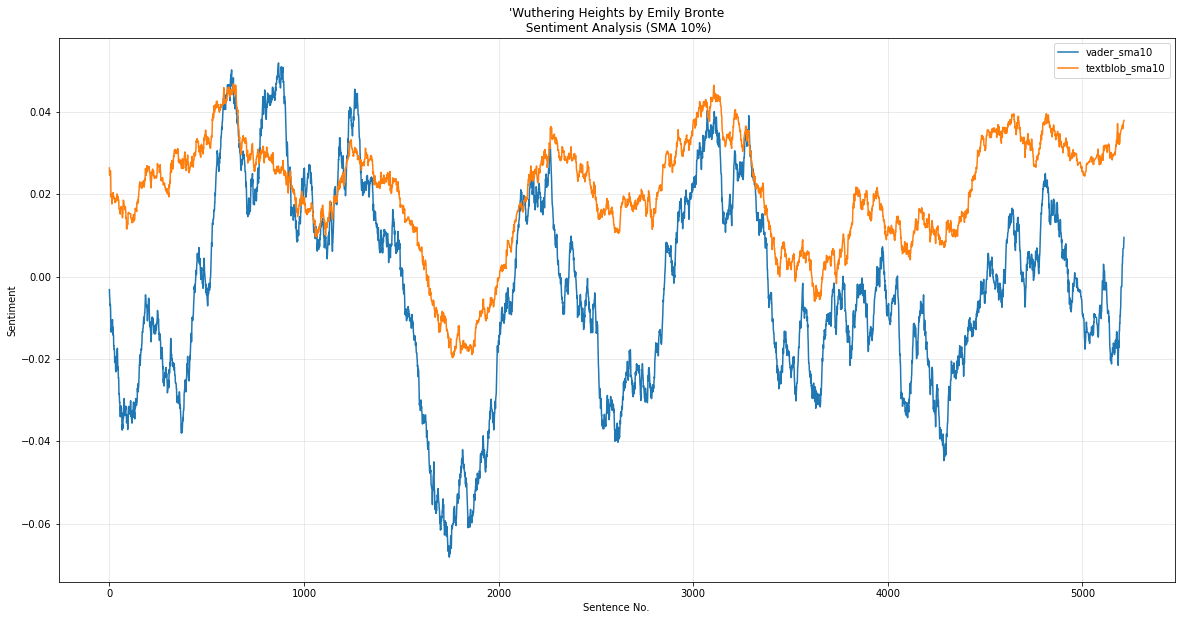

In [47]:
#@title Enter the Sliding Window width as Percent of Novel length (default 10%, larger=smoother)

window_percent = 10 #@param {type:"slider", min:1, max:20, step:1}

win_xper = int(window_percent/100 * novel_df.shape[0])

vader_col = f'vader_sma{window_percent}'
novel_df[vader_col] = novel_df['vader'].rolling(win_xper, center=True, min_periods=1).mean()

textblob_col = f'textblob_sma{window_percent}'
novel_df[textblob_col] = novel_df['textblob'].rolling(win_xper, center=True, min_periods=1).mean()
novel_df.plot(y=[vader_col, textblob_col])

plt.title(f'{Novel_Title}\n Sentiment Analysis (SMA {window_percent}%)')
plt.ylabel('Sentiment')
plt.xlabel('Sentence No.')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.show();

In [48]:
novel_df.head()

,text_raw,text_clean,text_raw_len,vader,textblob,vader_sma10,textblob_sma10
0,1801—I have just returned from a visit to my l...,-- returned visit landlord -- solitary neighbo...,108,-0.4588,-0.500,-0.003168,0.026397
1,This is certainly a beautiful country!,certainly beautiful country,38,0.7430,0.850,-0.004976,0.024769
2,"In all England, I do not believe that I could ...",england believe could fixed situation complete...,119,0.0000,0.100,-0.005153,0.024675
3,A perfect misanthropist’s Heaven—and Mr. Heath...,perfect misanthropist' heaven-- mr heathcliff ...,119,0.7906,0.775,-0.007004,0.024582
4,A capital fellow!,capital fellow,17,0.0000,0.000,-0.006783,0.025217


# **Crux Detection**

## **Scipy Signal Find_Peaks**

* https://stackoverflow.com/questions/1713335/peak-finding-algorithm-for-python-scipy

In [49]:
from scipy.signal import find_peaks

In [50]:
#@title Which Lexicon?

Sentiment_Model = "VADER" #@param ["VADER", "TextBlob"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: PeakPropertyWarning:

some peaks have a width of 0



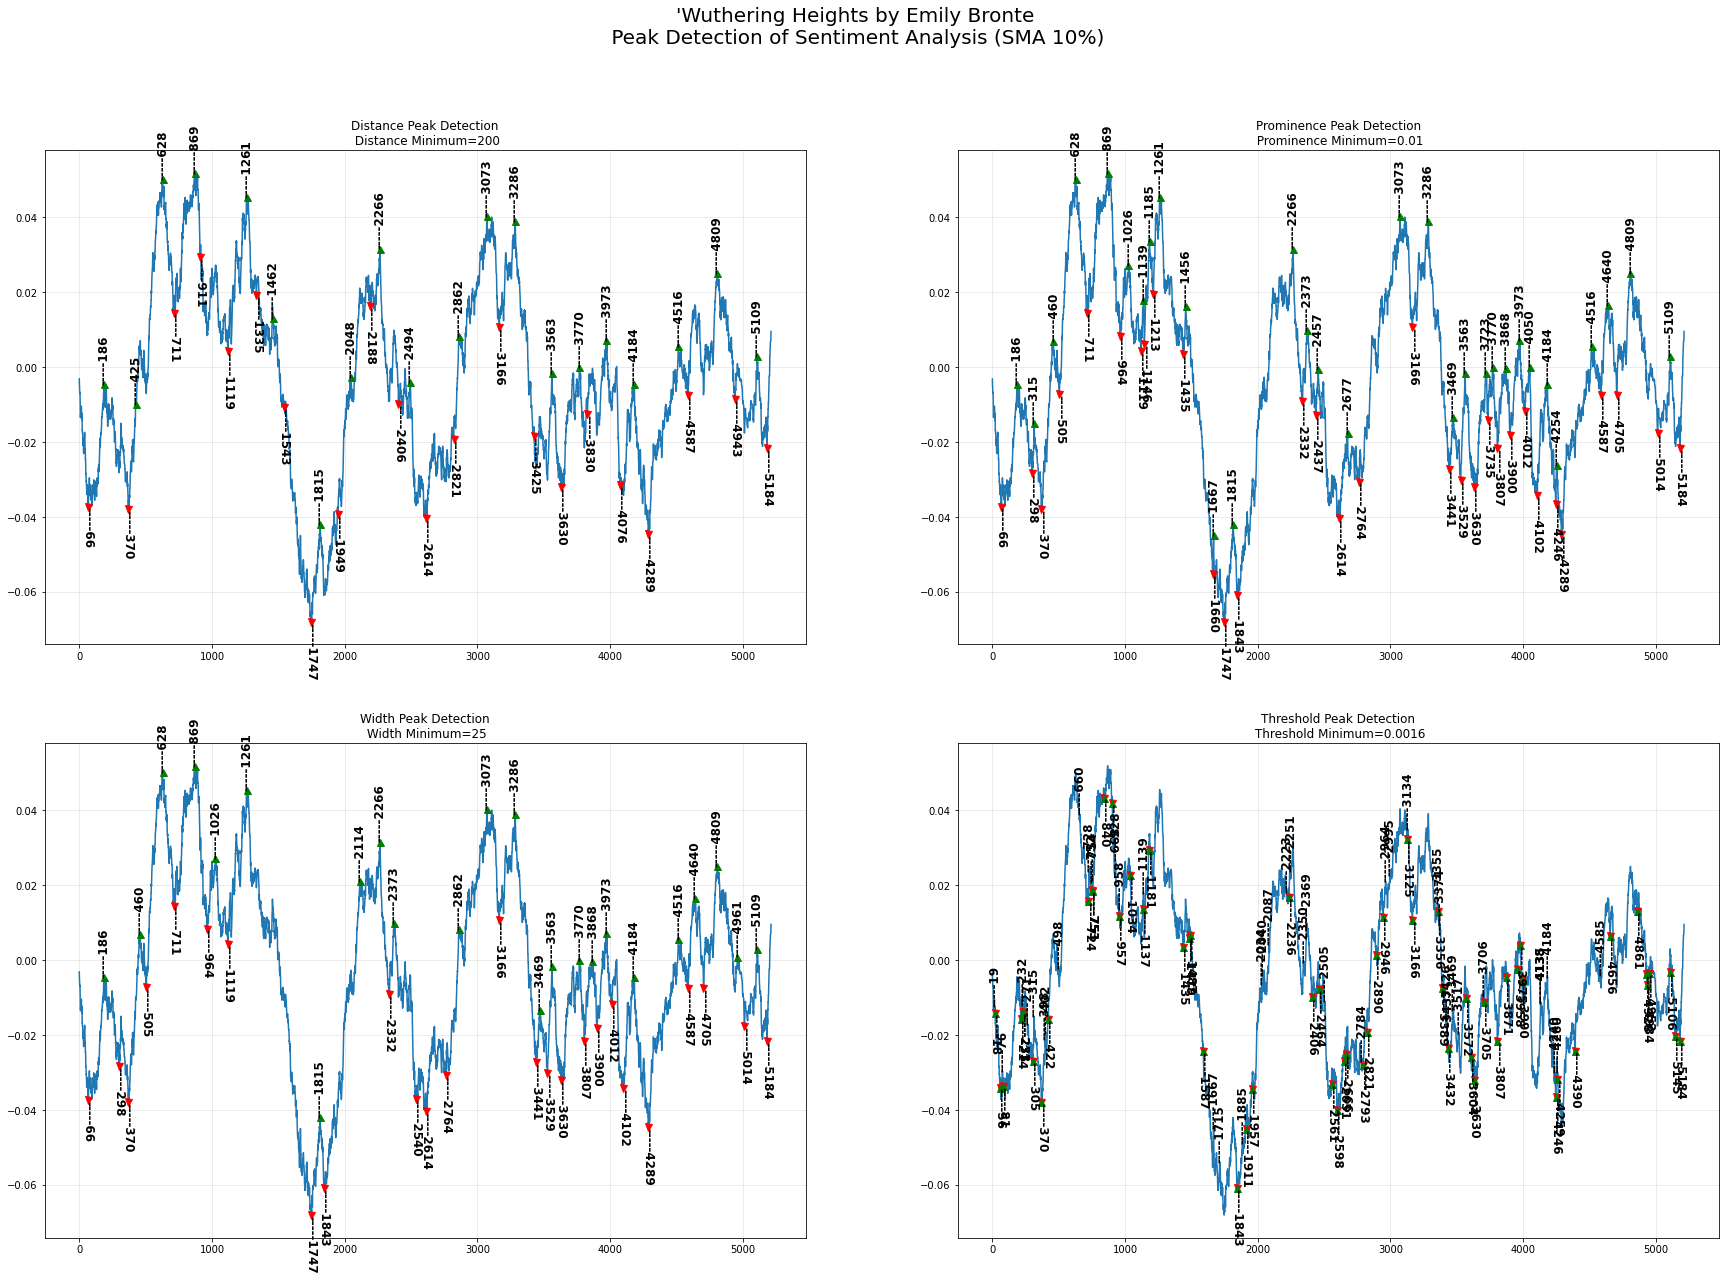

In [51]:
#@title Tune the main Hyperparameter for each of the 4 Peak Detection Algorithms:

Distance_Min = 200 #@param {type:"slider", min:100, max:1000, step:10}
Prominence_Min = 0.01 #@param {type:"slider", min:0.001, max:0.05, step:0.001}
Width_Min = 25 #@param {type:"slider", min:25, max:500, step:5}
Threshold_Min = 0.0016 #@param {type:"slider", min:0.0001, max:0.002, step:0.0001}

plt.rcParams['figure.figsize'] = [30, 20]

model_name = f'{Sentiment_Model.lower()}_sma{window_percent}'

x = novel_df[model_name]

# Peak Algo #1 (by Distance)
distance_min = Distance_Min # 750

# Peak Algo #2 (by Prominence)
prominence_min = Prominence_Min # 0.01

# Peak Algo #3 (by Width)
width_min = Width_Min # 175

# Peak Algo #4 (by Threshold)
threshold_min = Threshold_Min # 0.001


peaks, _ = find_peaks(x, distance=distance_min)
peaks2, _ = find_peaks(x, prominence=prominence_min)      # BEST!
peaks3, _ = find_peaks(x, width=width_min)
peaks4, _ = find_peaks(x, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


x_inv = pd.Series([-x for x in novel_df[model_name].to_list()])

valleys, _ = find_peaks(x_inv, distance=distance_min)
valleys2, _ = find_peaks(x_inv, prominence=prominence_min)      # BEST!
valleys3, _ = find_peaks(x_inv, width=width_min)
valleys4, _ = find_peaks(x_inv, threshold=threshold_min)     # Required vertical distance to its direct neighbouring samples, pretty useless


plt.subplot(2, 2, 1)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Distance Peak Detection\n Distance Minimum={distance_min}')
plt.plot(peaks, x[peaks], "^g", markersize=7)
plt.plot(valleys, x[valleys], "vr", markersize=7)
for x_val in peaks:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

plt.subplot(2, 2, 2)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Prominence Peak Detection\n Prominence Minimum={prominence_min}')
plt.plot(peaks2, x[peaks2], "^g", markersize=7)
plt.plot(valleys2, x[valleys2], "vr", markersize=7)
for x_val in peaks2:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys2:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


plt.subplot(2, 2, 3)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Width Peak Detection\n Width Minimum={width_min}')
plt.plot(valleys3, x[valleys3], "vr", markersize=7)
plt.plot(peaks3, x[peaks3], "^g", markersize=7)
for x_val in peaks3:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys3:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')


plt.subplot(2, 2, 4)
plt.grid(True, alpha=0.3)
plt.plot(x)
plt.title(f'Threshold Peak Detection\n Threshold Minimum={threshold_min}')
plt.plot(valleys4, x[valleys4], "vr", markersize=7)
plt.plot(valleys4, x[valleys4], "^g", markersize=7)
for x_val in peaks4:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='bottom', rotation=90, size='large', color='black', weight='semibold')
for x_val in valleys4:
  plt.text(x_val, x[x_val], f'-----{x_val}', ha='center', va='top', rotation=270, size='large', color='black', weight='semibold')

plt.suptitle(f'{Novel_Title}\n Peak Detection of Sentiment Analysis (SMA {window_percent}%)', fontsize=20)
plt.grid(True, alpha=0.3)

plt.show()

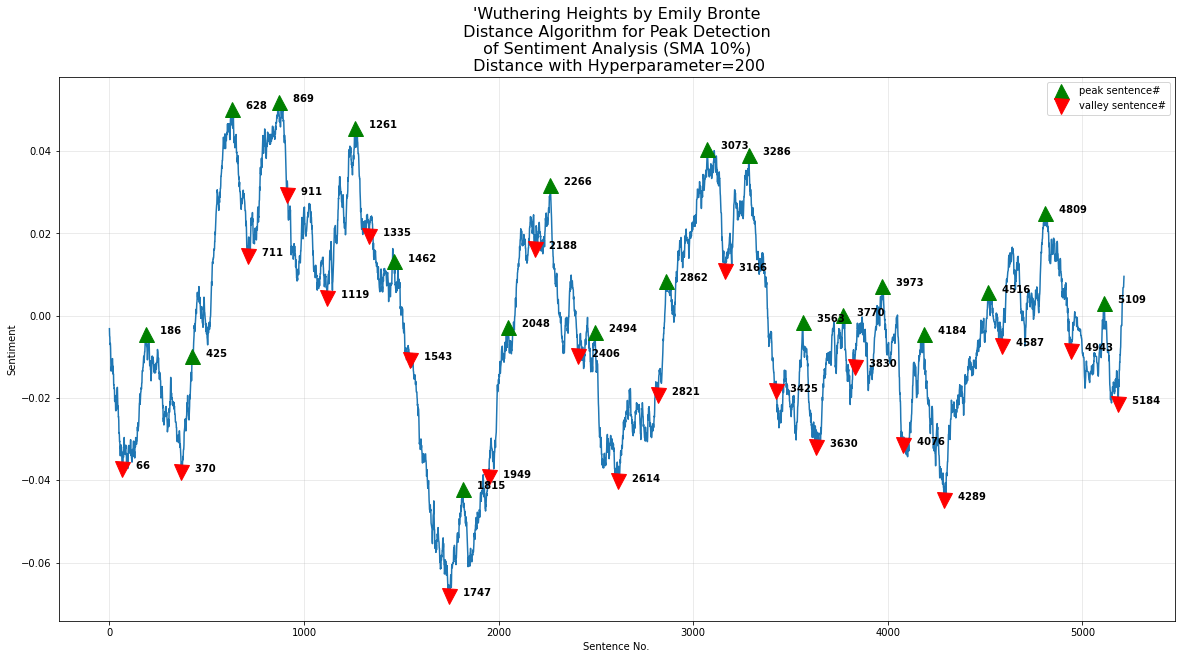



     >>>>> SAVED PLOT TO FILE: [cruxes_plot_'Wuthering_Heights_by_Emily_Bronte.png] <<<<<


In [52]:
#@title Select a Peak Detection Algorithms to View in Detail (usually Distance or Width is best):

plt.rcParams['figure.figsize'] = [20, 10]

Peak_Algorithm = "Distance" #@param ["Distance", "Prominence", "Width", "Threshold"]

if Peak_Algorithm == 'Distance':
  hyperparam = distance_min
  peaks = peaks
  valleys = valleys
elif Peak_Algorithm == 'Prominence':
  hyperparam = prominence_min
  peaks = peaks2
  valleys = valleys2  
elif Peak_Algorithm == 'Width':
  hyperparam = width_min
  peaks = peaks3
  valleys = valleys3
else:
  # Assume Peak_Algorithm == 'Threshold'
  hyperparam = threshold_min
  peaks = peaks4
  valleys = valleys4

# model_name = f'{Sentiment_Model.lower()}_sma10'

# x = novel_clean_df[model_name]

# peaks2, _ = find_peaks(x, prominence=peak_prominence)  

# x_inv = pd.Series([-x for x in novel_clean_df[model_name].to_list()])
# valleys2, _ = find_peaks(x_inv, prominence=peak_prominence)     

plt.plot(x)
plt.plot(peaks, x[peaks], "^g", markersize=15, label='peak sentence#')
plt.plot(valleys, x[valleys], "vr", markersize=15, label='valley sentence#')
for x_val in peaks:
  plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
for x_val in valleys:
  plt.text(x_val, x[x_val], f'    {x_val}', horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title(f'{Novel_Title}\n {Peak_Algorithm} Algorithm for Peak Detection \n of Sentiment Analysis (SMA {window_percent}%) \n {Peak_Algorithm} with Hyperparameter={hyperparam}', fontsize=16)
plt.ylabel('Sentiment')
plt.xlabel('Sentence No.')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

filename_plot = f"cruxes_plot_{Novel_Title.replace(' ', '_')}.png"
plt.savefig(filename_plot, dpi=300)
plt.show();

print(f'\n\n     >>>>> SAVED PLOT TO FILE: [{filename_plot}] <<<<<')

In [53]:
# Download Crux Point Plot file 'crux_plot.png' to your laptop

files.download(filename_plot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Get Context around Crux Points**

In [54]:
#@title How many Sentences around Crux Point do you want to view for context?

Crux_Sentence_Context_Count = 10 #@param {type:"slider", min:1, max:20, step:1}


**[NOTE] May have to run 2-3x times to save file**

In [55]:
peaks

array([ 186,  425,  628,  869, 1261, 1462, 1815, 2048, 2266, 2494, 2862,
       3073, 3286, 3563, 3770, 3973, 4184, 4516, 4809, 5109])

In [57]:
%%capture cap --no-stderr

# Print Context around each Sentiment Peak

novel_sent_len = novel_df.shape[0]
halfwin = int(Crux_Sentence_Context_Count/2)
crux_sents_ls = []
nl = '\n'

print('==================================================')
print('============     Peak Crux Points   ==============')
print('==================================================\n\n')

# for i, apeak in enumerate(peaks2):
for i, apeak in enumerate(peaks):
  crux_sents_ls = []
  win_start = max(0, apeak-halfwin)
  win_end = min(apeak+halfwin+1, novel_sent_len)
  # for sent_idx in range(apeak-halfwin,apeak+halfwin+1):
  for sent_idx in range(win_start,win_end):

    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == apeak:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)
  
  # context_ls = novel_df.iloc[apeak-halfwin:apeak+halfwin].text_raw
  print(f"Peak #{i} at Sentence #{apeak}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

print('==================================================')
print('===========     Crux Valley Points    ============')
print('==================================================\n\n')


# for i, avalley in enumerate(valleys2):
for i, avalley in enumerate(valleys):
  crux_sents_ls = []
  win_start = max(0, avalley-halfwin)
  win_end = min(avalley+halfwin+1, novel_sent_len)
  # for sent_idx in range(avalley-halfwin,avalley+halfwin+1):
  for sent_idx in range(win_start,win_end):
    sent_cur = novel_df.iloc[sent_idx].text_raw
    if sent_idx == avalley:
      sent_str = sent_cur.upper()
    else:
      sent_str = sent_cur
    crux_sents_ls.append(sent_str)

  # context_ls = novel_df.iloc[avalley-halfwin:avalley+halfwin].text_raw
  print(f"Valley #{i} at Sentence #{avalley}:\n\n{nl.join(crux_sents_ls)}\n\n\n")

filename_cruxes = f"cruxes_context_{Novel_Title.replace(' ', '_')}.txt" 

with open(filename_cruxes, 'w') as f:
    f.write(str(cap))

In [58]:
# Download Crux Point Report file 'cruxes.txt' to your laptop

files.download(filename_cruxes)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **END OF NOTEBOOK**